<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/ESAA_YB_WEEK14_1_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCA_country_data**

[link text](https://www.kaggle.com/code/nimapourmoradi/pca-country-data)

In [1]:
!pip install kneed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style("darkgrid")


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, SpectralClustering, DBSCAN, AffinityPropagation, estimate_bandwidth
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from kneed import KneeLocator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/ESAA/Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [5]:
data.dtypes

,0
country,object
child_mort,float64
exports,float64
health,float64
imports,float64
income,int64
inflation,float64
life_expec,float64
total_fer,float64
gdpp,int64


In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
data.isna().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
columns = list(data.columns)

for location, value in enumerate(columns):
  print(location, ':', value)

0 : country
1 : child_mort
2 : exports
3 : health
4 : imports
5 : income
6 : inflation
7 : life_expec
8 : total_fer
9 : gdpp


## plots

In [10]:
country = data.country

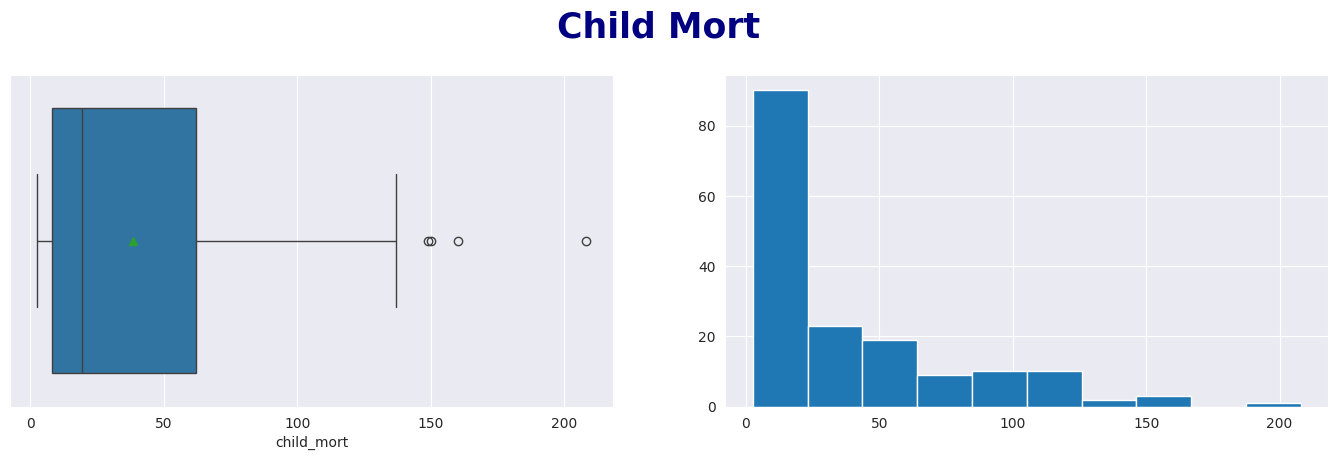

In [11]:
# column 1 = child_mort
fig , ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
fig.suptitle('Child Mort', fontweight='bold', fontsize=25.0, color='navy')

# ax[0]
sns.boxplot(ax=ax[0], data=data.child_mort, showmeans=True, orient='h')

# ax[1]
data.child_mort.hist().set(xticks=range(0, 250,  50))
plt.show()

In [12]:
data[data.child_mort > 200]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662


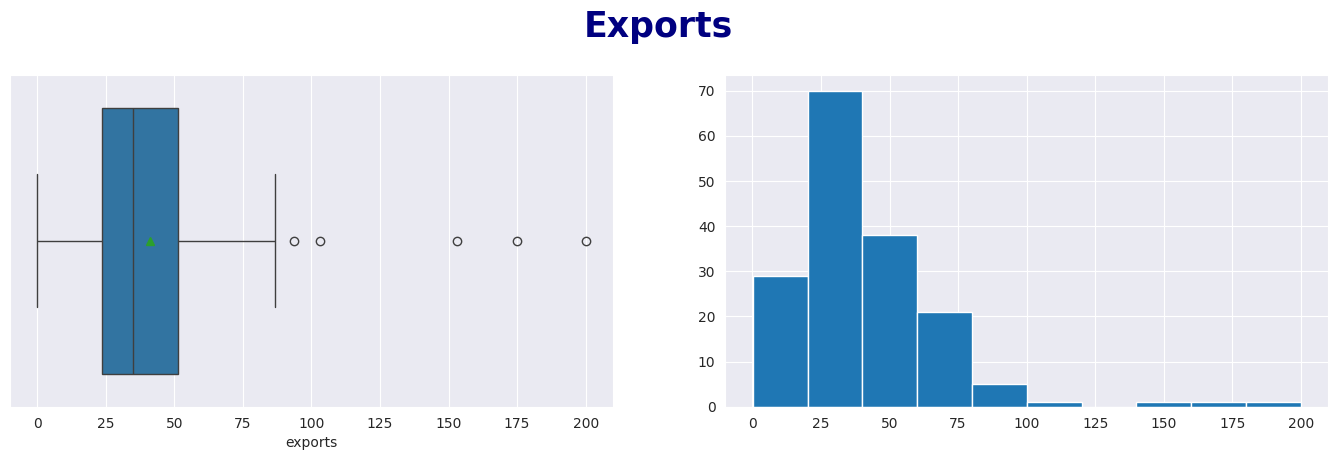

In [13]:
# column 2 = child_mort
fig , ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
fig.suptitle('Exports', fontweight='bold', fontsize=25.0, color='navy')

# ax[0]
sns.boxplot(ax=ax[0], data=data.exports, showmeans=True, orient='h')

# ax[1]
data.exports.hist()
plt.show()

In [14]:
data[data.exports > 125]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


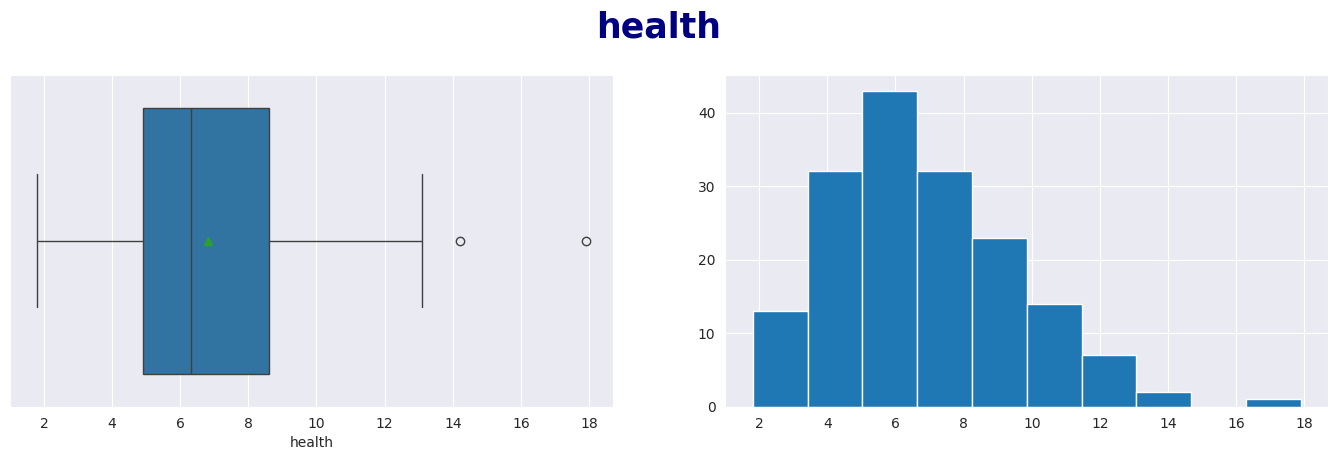

In [15]:
# column 3 = health
fig , ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
fig.suptitle('health', fontweight='bold', fontsize=25.0, color='navy')

# ax[0]
sns.boxplot(ax=ax[0], data=data.health, showmeans=True, orient='h')

# ax[1]
data.health.hist()
plt.show()

In [16]:
data[data.health > 14]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
101,"Micronesia, Fed. Sts.",40.0,23.5,14.2,81.0,3340,3.80,65.4,3.46,2860
159,United States,7.3,12.4,17.9,15.8,49400,1.22,78.7,1.93,48400


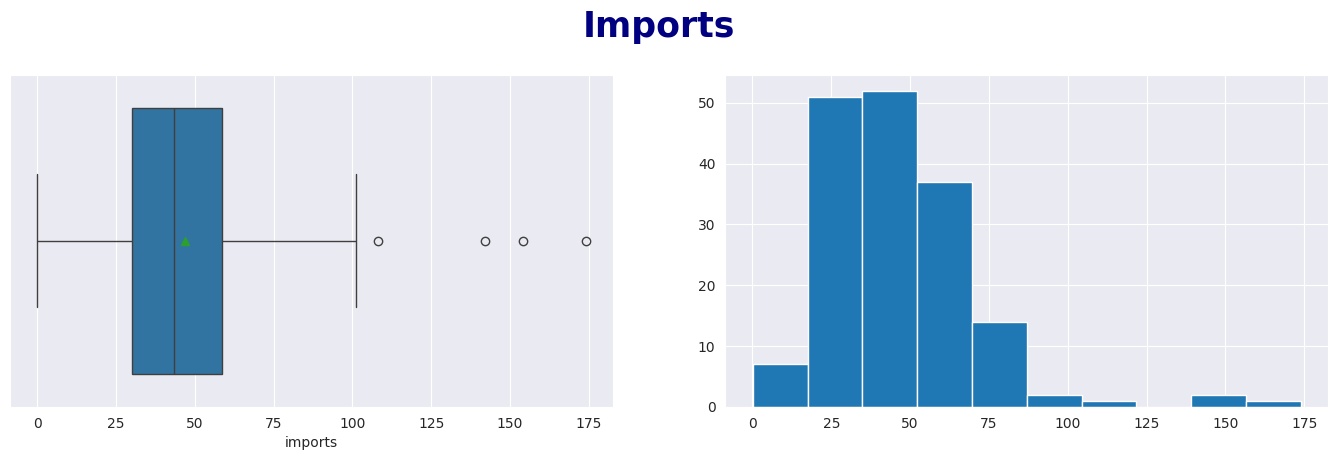

In [17]:
# column 4 = imports
fig , ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
fig.suptitle('Imports', fontweight='bold', fontsize=25.0, color='navy')

# ax[0]
sns.boxplot(ax=ax[0], data=data.imports, showmeans=True, orient='h')

# ax[1]
data.imports.hist()
plt.show()

In [18]:
data[data.imports > 125]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


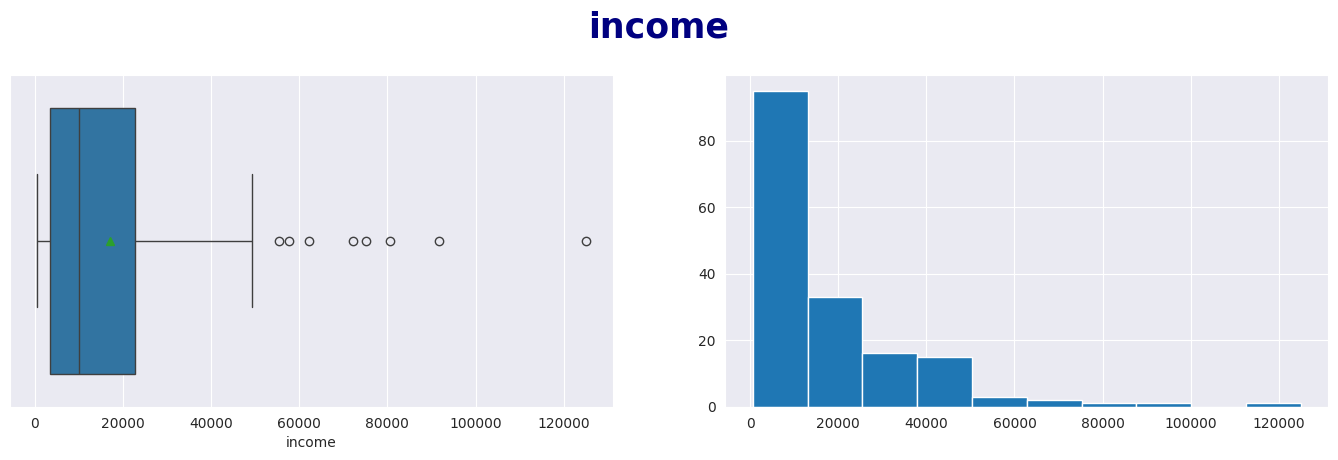

In [19]:
# column 5 = income
fig , ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
fig.suptitle('income', fontweight='bold', fontsize=25.0, color='navy')

# ax[0]
sns.boxplot(ax=ax[0], data=data.income, showmeans=True, orient='h')

# ax[1]
data.income.hist()
plt.show()

In [20]:
data[data.income > 60000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


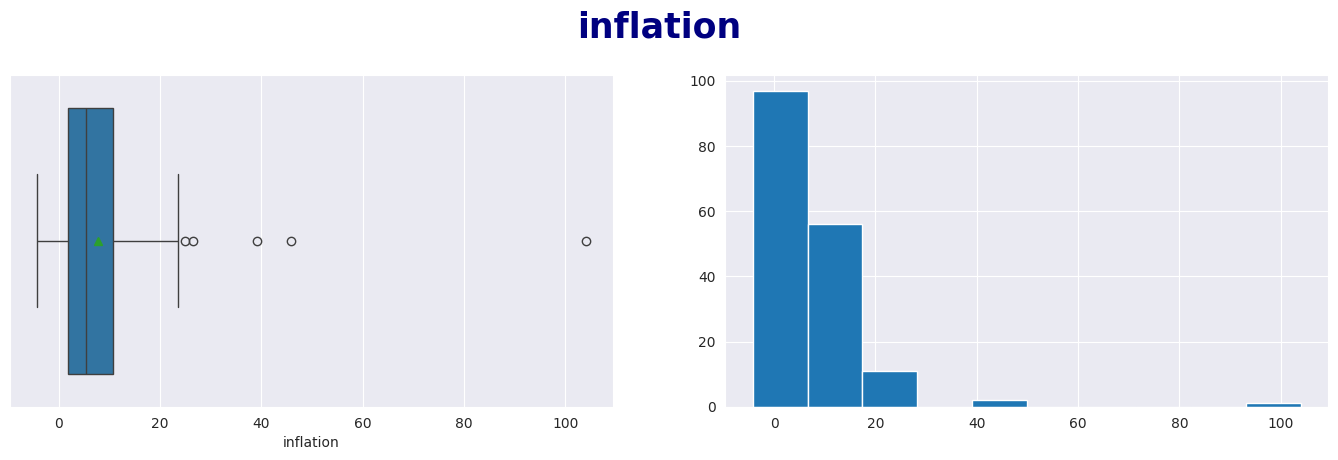

In [21]:
# column 6 = inflation
fig , ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
fig.suptitle('inflation', fontweight='bold', fontsize=25.0, color='navy')

# ax[0]
sns.boxplot(ax=ax[0], data=data.inflation, showmeans=True, orient='h')

# ax[1]
data.inflation.hist()
plt.show()

In [22]:
data[data.inflation > 40]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500


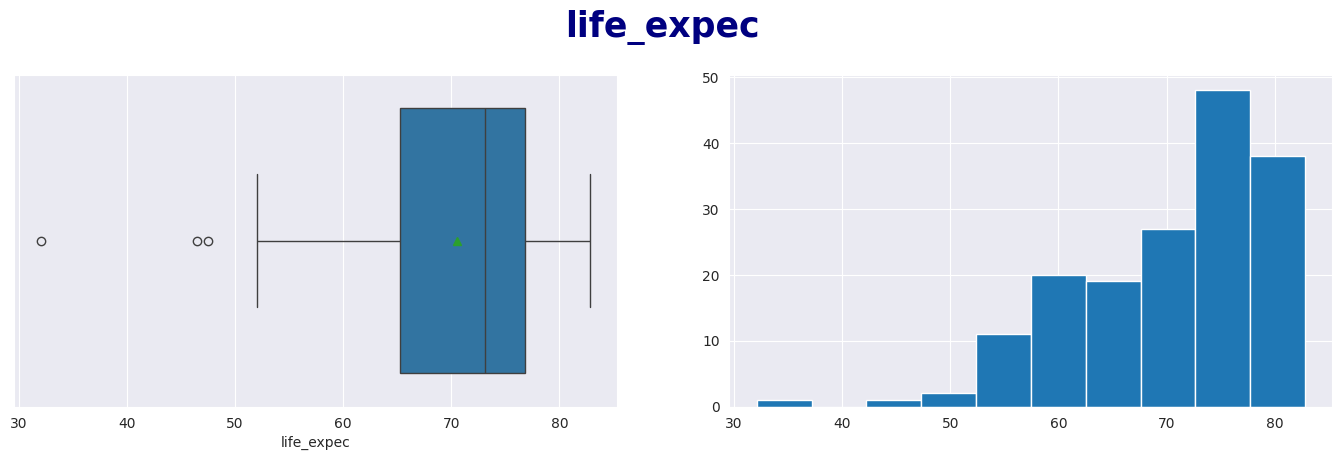

In [23]:
# column 7 = life_expec
fig , ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
fig.suptitle('life_expec', fontweight='bold', fontsize=25.0, color='navy')

# ax[0]
sns.boxplot(ax=ax[0], data=data.life_expec, showmeans=True, orient='h')

# ax[1]
data.life_expec.hist()
plt.show()

In [24]:
data[data.life_expec < 50]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170


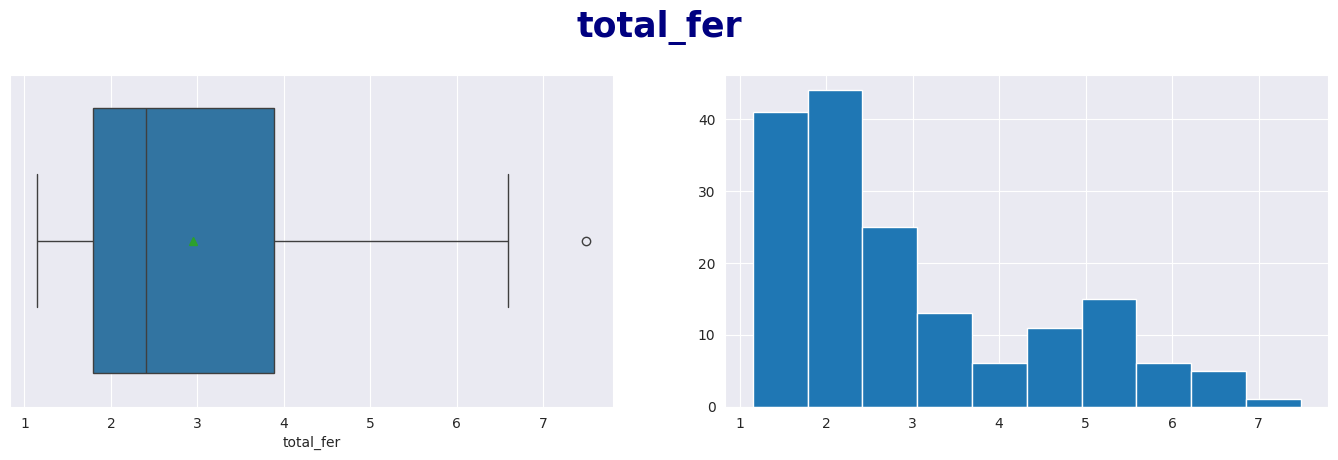

In [25]:
# column 8 = total_fer
fig , ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
fig.suptitle('total_fer', fontweight='bold', fontsize=25.0, color='navy')

# ax[0]
sns.boxplot(ax=ax[0], data=data.total_fer, showmeans=True, orient='h')

# ax[1]
data.total_fer.hist()
plt.show()

In [26]:
data[data.total_fer > 7]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348


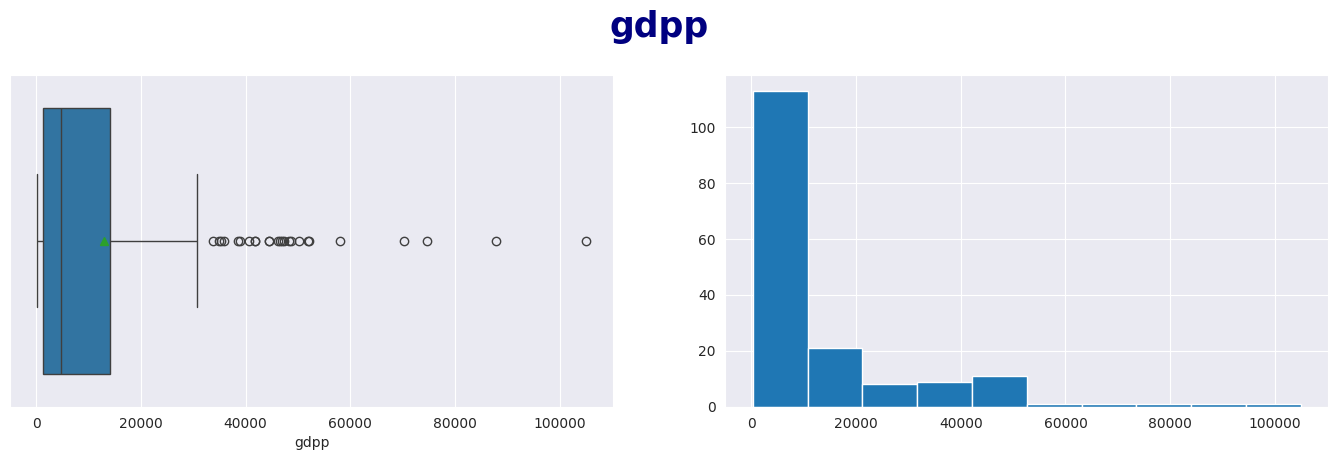

In [27]:
# column 9 = gdpp
fig , ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
fig.suptitle('gdpp', fontweight='bold', fontsize=25.0, color='navy')

# ax[0]
sns.boxplot(ax=ax[0], data=data.gdpp, showmeans=True, orient='h')

# ax[1]
data.gdpp.hist()
plt.show()

In [28]:
data[data.gdpp > 60000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600


In [29]:
corelation_matrix = data.drop(columns='country').corr()
corelation_matrix.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.00,-0.32,-0.20,-0.13,-0.52,0.29,-0.89,0.85,-0.48
exports,-0.32,1.00,-0.11,0.74,0.52,-0.11,0.32,-0.32,0.42
health,-0.20,-0.11,1.00,0.10,0.13,-0.26,0.21,-0.20,0.35
imports,-0.13,0.74,0.10,1.00,0.12,-0.25,0.05,-0.16,0.12
income,-0.52,0.52,0.13,0.12,1.00,-0.15,0.61,-0.50,0.90
inflation,0.29,-0.11,-0.26,-0.25,-0.15,1.00,-0.24,0.32,-0.22
life_expec,-0.89,0.32,0.21,0.05,0.61,-0.24,1.00,-0.76,0.60
total_fer,0.85,-0.32,-0.20,-0.16,-0.50,0.32,-0.76,1.00,-0.45
gdpp,-0.48,0.42,0.35,0.12,0.90,-0.22,0.60,-0.45,1.00


## Standardization

In [30]:
data1 = data.drop(columns='country')

In [31]:
standard_scaler = StandardScaler().fit_transform(data1)
df = pd.DataFrame(standard_scaler, columns=columns[1:])
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## PCA

In [32]:
# svd_solver='randomized' : PCA 내부 계산(SVD)을 랜덤화된 알고리즘으로 수행
pca = PCA(svd_solver='randomized', random_state=42, n_components=9).fit(df)

# 각 주성분이 전체 분산 중 몇 %를 설명하는지
exp = pca.explained_variance_ratio_
exp

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

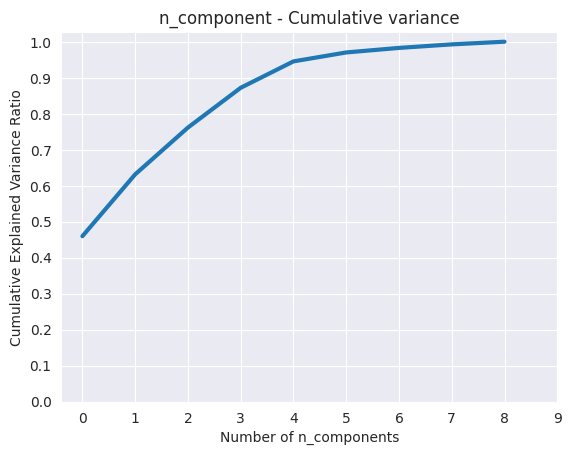

In [33]:
# np.cumsum() = 누적합 계산
plt.plot(np.cumsum(exp), linewidth=3)
plt.title('n_component - Cumulative variance')
plt.xlabel('Number of n_components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(0, 10, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [34]:
n = 1
for component in pca.components_ :
    print('n_component = ', n)
    print(component)
    print('_'*50)
    n+=1

n_component =  1
[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
  0.42583938 -0.40372896  0.39264482]
__________________________________________________
n_component =  2
[ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
 -0.22270674  0.15523311 -0.0460224 ]
__________________________________________________
n_component =  3
[-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
  0.11391854  0.01954925  0.12297749]
__________________________________________________
n_component =  4
[ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
 -0.20379723  0.37830365  0.53199457]
__________________________________________________
n_component =  5
[-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
  0.1082198  -0.13526221 -0.18016662]
__________________________________________________
n_component =  6
[-0.20062815  0.05933283 -0.00727646  0.03003154 -0.16034699 -0.06628537
  0.60112652  0.

In [35]:
# n_component=5
pca_df = pd.DataFrame({
    'Features' : columns[1:],
    'PC1' : pca.components_[0],
    'PC2' : pca.components_[1],
    'PC3' : pca.components_[2],
    'PC4' : pca.components_[3],
    'PC5' : pca.components_[4],
})
pca_df

,Features,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.419519,0.192884,-0.029544,0.370653,-0.168970
1,exports,0.283897,0.613163,0.144761,0.003091,0.057616
2,health,0.150838,-0.243087,-0.596632,0.461897,0.518000
3,imports,0.161482,0.671821,-0.299927,-0.071907,0.255376
4,income,0.398441,0.022536,0.301548,0.392159,-0.247150
5,inflation,-0.193173,-0.008404,0.642520,0.150442,0.714869
6,life_expec,0.425839,-0.222707,0.113919,-0.203797,0.108220
7,total_fer,-0.403729,0.155233,0.019549,0.378304,-0.135262
8,gdpp,0.392645,-0.046022,0.122977,0.531995,-0.180167


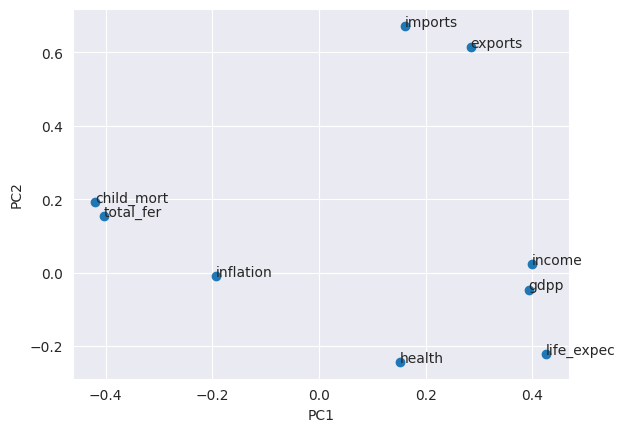

In [36]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('PC1')
plt.ylabel('PC2')

# enumerate() = 인덱스 & 값 반환
# plt.annotate() = 해당 좌표에 텍스트를 붙임 > plt.annotate(텍스트, (x좌표, y좌표))
for i, txt in enumerate(pca_df.Features):
    plt.annotate(txt, (pca_df.PC1[i], pca_df.PC2[i]))
plt.show()

- Performing Incremental PCA

In [37]:
# dimenstionality reduction using the four Principal Components
pca_final = IncrementalPCA(n_components=5)

In [38]:
df_pca = pca_final.fit_transform(df)
df_pca.shape

(167, 5)

- shape을 살펴보면, 행인 관측치가 167개, 열인 주성분이 5개
- transpose해서 행(가로축)에 주성분을 모으면, 하나씩 뽑아서 처리 용이

In [39]:
pc = np.transpose(df_pca)

In [40]:
corrmat = np.corrcoef(pc)

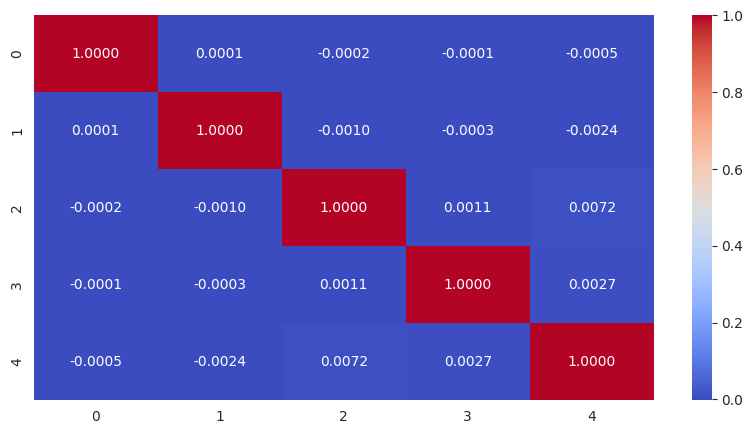

In [41]:
plt.figure(figsize = (10,5))
sns.heatmap(corrmat, annot = True, cmap='coolwarm', fmt='.4f', linecolor='white')
plt.show()

- heat map을 보았을 때, 서로 연관된 주성분이 없는 것을 알 수 있음

In [42]:
pcs_df2 = pd.DataFrame({
    'PC1':pc[0],
    'PC2':pc[1],
    'PC3':pc[2],
    'PC4':pc[3],
    'PC5':pc[4],
})
pcs_df2

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186
...,...,...,...,...,...
162,-0.820753,0.636404,-0.379488,-0.706886,-0.400381
163,-0.549894,-1.215018,3.074556,-0.108594,2.114025
164,0.498570,1.392777,-0.252849,-1.085037,1.156471
165,-1.887294,-0.105397,1.107639,0.062636,0.665467


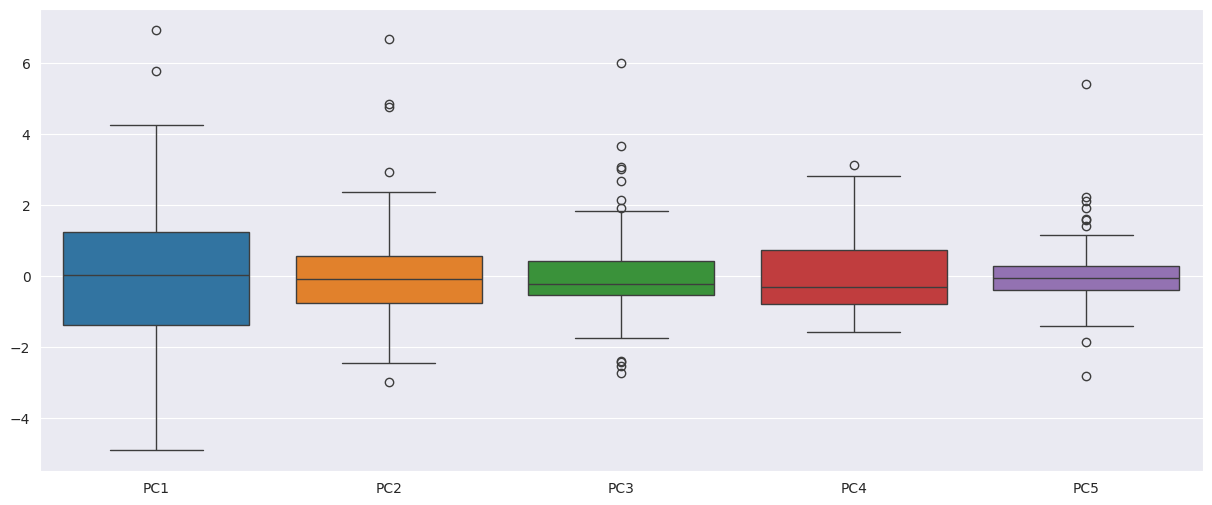

In [43]:
# Checking outliers of all the principal complnents
fig = plt.figure(figsize = (15,6))
sns.boxplot(data=pcs_df2)
plt.show()

In [44]:
pcs_df2.shape

(167, 5)

In [45]:
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


- 차원을 축소하여 KMeans가 더 안정적으로 군집을 찾게 하기 위함
- 변수가 많으면 점들 간 거리 구분이 약해지는데, PCA로 정보를 많이 담고 있는 몇 개의 축만 남기면 KMeans가 군집을 더 잘 찾게 됨

# Clustring

## KMeans

In [46]:
kmeans_set = {
    'init' : 'random',
    'n_init' : 10,
    'max_iter' : 300,
    'random_state' : 42
}
list_kmeans = []

# 클러스터 개수 n_clusters를 2,3,4,5,6,7,8,9로 바꿔가며 실험
for k in range(2, 10) :
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(pcs_df2)
    list_kmeans.append(kmeans.inertia_)

In [47]:
list_kmeans

[968.1808440726793,
 749.3671135105589,
 618.7904532470803,
 549.9739573675402,
 505.59823579093126,
 436.2740292797786,
 415.43898349378554,
 356.39897763197314]

## K 개수 판단

1.  Elbow (inertia/WCSS를 보고 사람이 팔꿈치 판단)

2.  KneeLocator (inertia 곡선에서 팔꿈치 자동 탐지)

3.  Silhouette score (클수록 좋음)

4.  Calinski–Harabasz score (클수록 좋음)

5.  Davies–Bouldin score (작을수록 좋음)

### **Elbow**
- 여러 k값에 대해 계산된 inertia를 바탕으로 최적의 군집 수를 사후적으로 판단하는 기법

< Within-Cluster Sum of Squares (WCSS) >

- 각 점이 자기 클러스터 중심까지의 거리 제곱을 다 더한 값
- 값이 작을수록 군집이 더 촘촘하게 모여있음
- k를 늘리면 거의 무조건 inertia는 감소

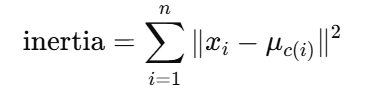

In [48]:
print('Minimum inertia', min(list_kmeans))
print('Number of clusters :', list_kmeans.index(min(list_kmeans))+2)
print('_'*50)
print('Maximum inertia', max(list_kmeans))
print('Number of clusters :', list_kmeans.index(max(list_kmeans))+2)

Minimum inertia 356.39897763197314
Number of clusters : 9
__________________________________________________
Maximum inertia 968.1808440726793
Number of clusters : 2


### **KneeLocator**

- 곡선에서 꺾이는 지점(knee / elbow)을 수학적으로 탐지하는 클래스
- 즉, 추가로 k를 늘려도 inertia 개선이 급격히 줄어드는 지점

In [49]:
k1 = KneeLocator(range(2, 10), list_kmeans, curve='convex', direction='decreasing')
k1.elbow

np.int64(4)

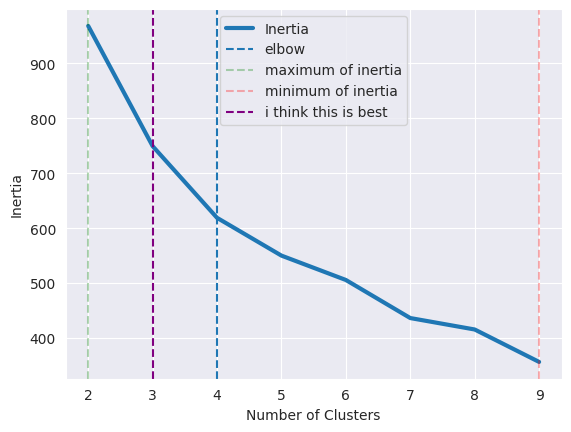

In [50]:
plt.plot(range(2, 10), list_kmeans, linewidth=3, label='Inertia')

# plt.axvline(x=값) : x = 값 위치에 수직선을 그림
plt.axvline(x=k1.elbow, ls='--', label='elbow')
plt.axvline(x=list_kmeans.index(max(list_kmeans))+2, alpha=0.3, ls='--',  label='maximum of inertia', color='green')
plt.axvline(x=list_kmeans.index(min(list_kmeans))+2, alpha=0.3, ls='--',  label='minimum of inertia', color='red')
plt.axvline(x=3, ls='--',  label='i think this is best', color='purple')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

### **silhouette score**

Best Silhouette_score :  0.3263894611759294
Best n_cluster :  4


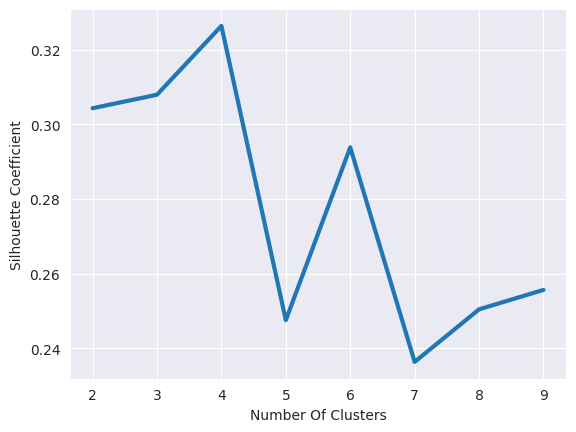

In [51]:
# Calculate silhouette score for kmeans
kmeans_sil_score = 0
kmeans_sil_n = 0
silhouette_coefficient = []

for k in range(2, 10) :
    kmeans = KMeans(n_clusters=k, **kmeans_set).fit(pcs_df2)
    score = silhouette_score(pcs_df2, kmeans.labels_)
    silhouette_coefficient.append(score)
    if score > kmeans_sil_score :
        kmeans_sil_score = score
        kmeans_sil_n = k
    else :
        continue
print('Best Silhouette_score : ', kmeans_sil_score)
print('Best n_cluster : ', kmeans_sil_n)

plt.plot(range(2, 10), silhouette_coefficient, linewidth=3)
plt.xticks(range(2, 10))
plt.xlabel('Number Of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

### **calinski_harabasz_score**

calinski_harabasz_score :  77.08120074713008
Best n_cluster :  2


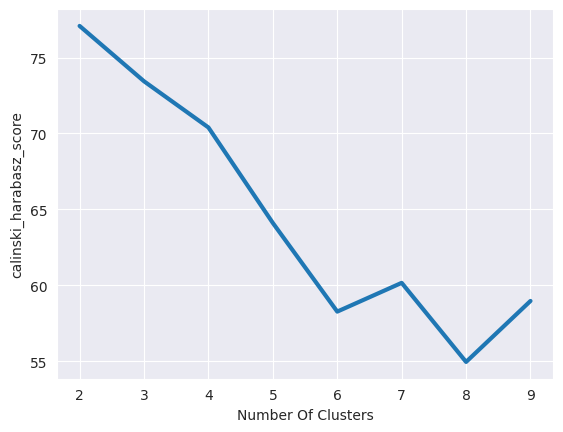

In [52]:
# Calculate calinski_harabasz_score for kmeans
kmeans_ch_score = 0
kmeans_ch_n = 0
calinski_coefficient = []
for k in range(2, 10) :
    kmeans = KMeans(n_clusters=k, **kmeans_set).fit(pcs_df2)
    score = calinski_harabasz_score(pcs_df2, kmeans.labels_)
    calinski_coefficient.append(score)
    if score > kmeans_ch_score :
        kmeans_ch_score = score
        kmeans_ch_n = k
    else :
        continue
print('calinski_harabasz_score : ', kmeans_ch_score)
print('Best n_cluster : ', kmeans_ch_n)

plt.plot(range(2, 10), calinski_coefficient, linewidth=3)
plt.xticks(range(2, 10))
plt.xlabel('Number Of Clusters')
plt.ylabel('calinski_harabasz_score')
plt.show()

- best n_clusters = 7, 9
- we choose 7

In [53]:
calinski_coefficient

[np.float64(77.08120074713008),
 np.float64(73.43643565042868),
 np.float64(70.39248188809727),
 np.float64(64.10356944030563),
 np.float64(58.26569585577725),
 np.float64(60.15797061408716),
 np.float64(54.9507316422406),
 np.float64(58.96622468537698)]

In [54]:
kmeans_ch_score = 119.40949463416615
kmeans_ch_n = 3

### **davies_bouldin_score**

davies_bouldin_score :  0.9746253372522917
Best n_cluster :  4


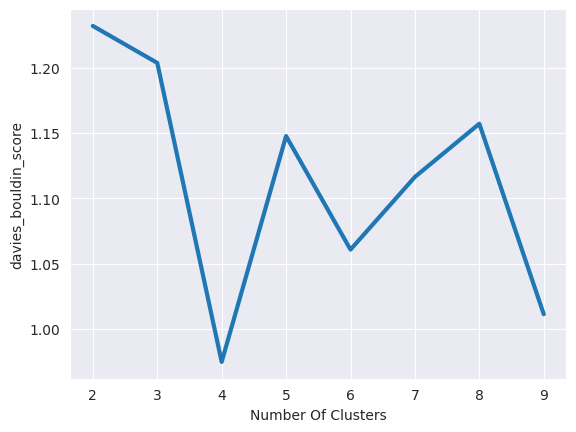

In [55]:
# Calculate davies_bouldin_score for kmeans
kmeans_davies_score = 100
kmeans_davies_n = 100
davis_coefficient = []
for k in range(2, 10) :
    kmeans = KMeans(n_clusters=k, **kmeans_set).fit(pcs_df2)
    score = davies_bouldin_score(pcs_df2, kmeans.labels_)
    davis_coefficient.append(score)
    if score < kmeans_davies_score :
        kmeans_davies_score = score
        kmeans_davies_n = k
    else :
        continue
print('davies_bouldin_score : ', kmeans_davies_score)
print('Best n_cluster : ', kmeans_davies_n)

plt.plot(range(2, 10), davis_coefficient, linewidth=3)
plt.xticks(range(2, 10))
plt.xlabel('Number Of Clusters')
plt.ylabel('davies_bouldin_score')
plt.show()

## MiniBatchKMeans

- KMeans는 매 반복마다 전체 데이터를 보고 중심(centroid)을 업데이트
- MiniBatchKMeans는 매 반복마다 일부 샘플(미니배치)만 뽑아서 중심을 업데이트(근사)
> 그래서 속도↑, 메모리↓, 대신 결과가 약간 근사

In [56]:
list_mini = []

for k in range(2, 10) :
    mini = MiniBatchKMeans(n_clusters=k)
    mini.fit(pcs_df2)
    list_mini.append(mini.inertia_)

In [57]:
print('Maximum inertia', max(list_mini))
print('Number of clusters :', list_mini.index(max(list_mini))+2)
print('_'*50)
print('Minimum inertia', min(list_mini))
print('Number of clusters :', list_mini.index(min(list_mini))+2)

Maximum inertia 1230.7614883986498
Number of clusters : 2
__________________________________________________
Minimum inertia 376.9135141595059
Number of clusters : 9


### **KneeLocator**

In [58]:
k1 = KneeLocator(range(2, 10), list_mini, curve='convex', direction='decreasing')
k1.elbow

np.int64(4)

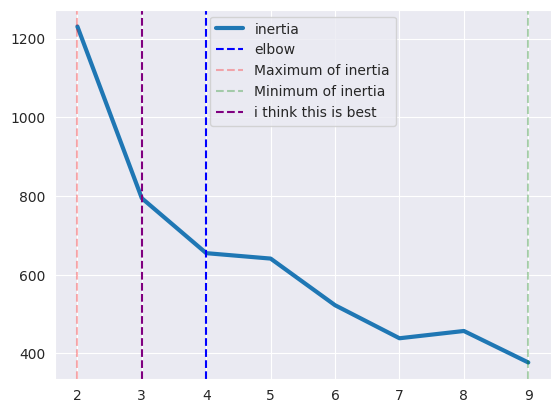

In [59]:
plt.plot(range(2, 10), list_mini, linewidth=3, label='inertia')
plt.xticks(range(2, 10 , 1))
plt.axvline(x=k1.elbow, ls='--', label='elbow', c='b')
plt.axvline(x=list_mini.index(max(list_mini))+2, alpha=0.3, ls='--', label='Maximum of inertia', c='r')
plt.axvline(x=list_mini.index(min(list_mini))+2, alpha=0.3, ls='--', label='Minimum of inertia', c='g')
plt.axvline(x=3, ls='--',  label='i think this is best', color='purple')
plt.legend()
plt.show()

### **Silhouette**

Silhouette Score :  0.310284467994274
Best n_clusters :  3


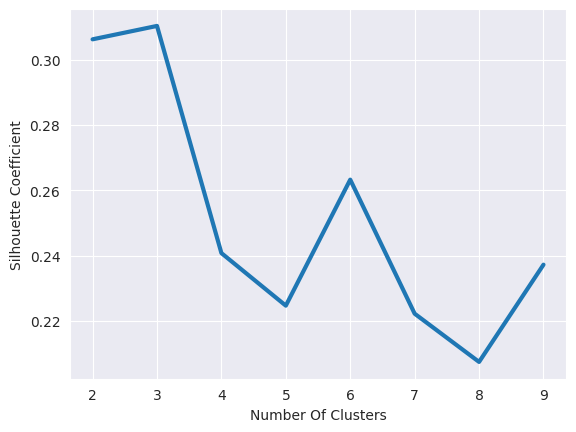

In [60]:
mini_sil_score = 0
mini_sil_n = 0
mini_sil_coef = []

for k in range(2, 10) :
    mini = MiniBatchKMeans(n_clusters=k)
    mini.fit(pcs_df2)
    score =  silhouette_score(pcs_df2, mini.labels_)
    mini_sil_coef.append(score)
    if score > mini_sil_score :
        mini_sil_score = score
        mini_sil_n = k
    else :
        continue

print('Silhouette Score : ', mini_sil_score)
print('Best n_clusters : ', mini_sil_n)

plt.plot(range(2, 10), mini_sil_coef, linewidth=3)
plt.xticks(range(2, 10))
plt.xlabel('Number Of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

### **calinski_harabasz_score**

calinski_harabasz_score :  69.97502068119843
Best n_clusters :  3


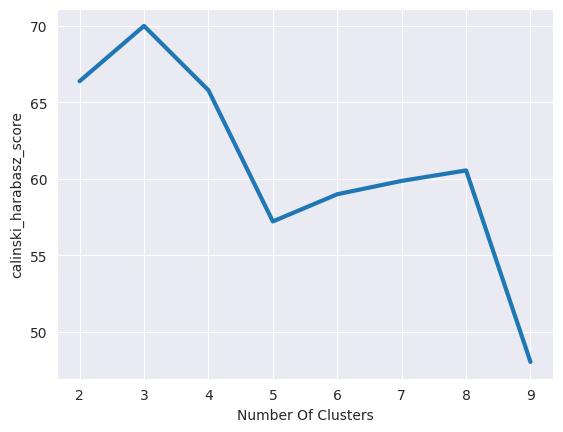

In [61]:
mini_ch_score = 0
mini_ch_n = 0
mini_ch_coef = []

for k in range(2, 10) :
    mini = MiniBatchKMeans(n_clusters=k)
    mini.fit(pcs_df2)
    score =  calinski_harabasz_score(pcs_df2, mini.labels_)
    mini_ch_coef.append(score)
    if score > mini_ch_score :
        mini_ch_score = score
        mini_ch_n = k
    else :
        continue

print('calinski_harabasz_score : ', mini_ch_score)
print('Best n_clusters : ', mini_ch_n)

plt.plot(range(2, 10), mini_ch_coef, linewidth=3)
plt.xticks(range(2, 10))
plt.xlabel('Number Of Clusters')
plt.ylabel('calinski_harabasz_score')
plt.show()

mini_ca_score = max(mini_ch_coef)

### **davies_bouldin_score**

davies_bouldin_score :  0.9788413195566261
Best n_clusters :  4


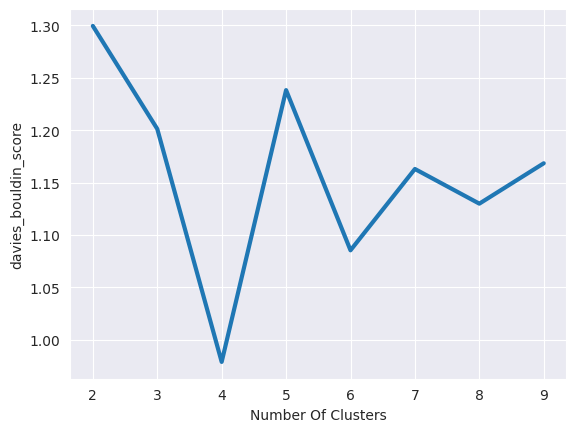

In [62]:
mini_davies_score = 100
mini_davies_n = 100
mini_davies_coef = []

for k in range(2,10) :
    mini = MiniBatchKMeans(n_clusters=k)
    mini.fit(pcs_df2)
    score =  davies_bouldin_score(pcs_df2, mini.labels_)
    mini_davies_coef.append(score)
    if score < mini_davies_score :
        mini_davies_score = score
        mini_davies_n = k
    else :
        continue

print('davies_bouldin_score : ', mini_davies_score)
print('Best n_clusters : ', mini_davies_n)

plt.plot(range(2, 10), mini_davies_coef, linewidth=3)
plt.xticks(range(2, 10))
plt.xlabel('Number Of Clusters')
plt.ylabel('davies_bouldin_score')
plt.show()

mini_davies_score = max(mini_davies_coef)

# DBSCAN

In [63]:
list_sil = []
list_davies = []
list_ch = []
list_n = []
list_noise = []
list_eps = []

for i in range(0, 40, 1):
    e = 0.5 + (i*0.05)
    dbscan = DBSCAN(eps=e)
    dbscan.fit(pcs_df2)

    labels = dbscan.labels_
    if len(labels) > 1 :

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        if n_clusters_ > 1 :

            list_eps.append(e)
            list_n.append(n_clusters_)
            list_noise.append(n_noise_)
            sil = silhouette_score(pcs_df2, labels)
            davies = davies_bouldin_score(pcs_df2, labels)
            ch = calinski_harabasz_score(pcs_df2, labels)

            list_sil.append(sil)
            list_davies.append(davies)
            list_ch.append(ch)

            print("eps = ", e)
            print("Estimated number of clusters: %d" % n_clusters_)
            print("Estimated number of noise points: %d" % n_noise_)
            print('Silhouette : ', sil)
            print('Davis : ', davies)
            print('CH Score : ',   ch)
            print('\n____________________________________________________________________\n')
print("END")

eps =  0.6
Estimated number of clusters: 2
Estimated number of noise points: 153
Silhouette :  -0.2542315057099229
Davis :  2.1163308693300604
CH Score :  1.6725867869341806

____________________________________________________________________

eps =  0.65
Estimated number of clusters: 4
Estimated number of noise points: 140
Silhouette :  -0.3039203906607828
Davis :  1.8394219851742957
CH Score :  2.8722294203023697

____________________________________________________________________

eps =  0.7
Estimated number of clusters: 4
Estimated number of noise points: 125
Silhouette :  -0.2087809136269441
Davis :  1.9144455971537337
CH Score :  4.946484582819774

____________________________________________________________________

eps =  0.75
Estimated number of clusters: 4
Estimated number of noise points: 114
Silhouette :  -0.1598731478941704
Davis :  1.9233273429696407
CH Score :  5.7607280899947595

____________________________________________________________________

eps =  0.8
Estimate

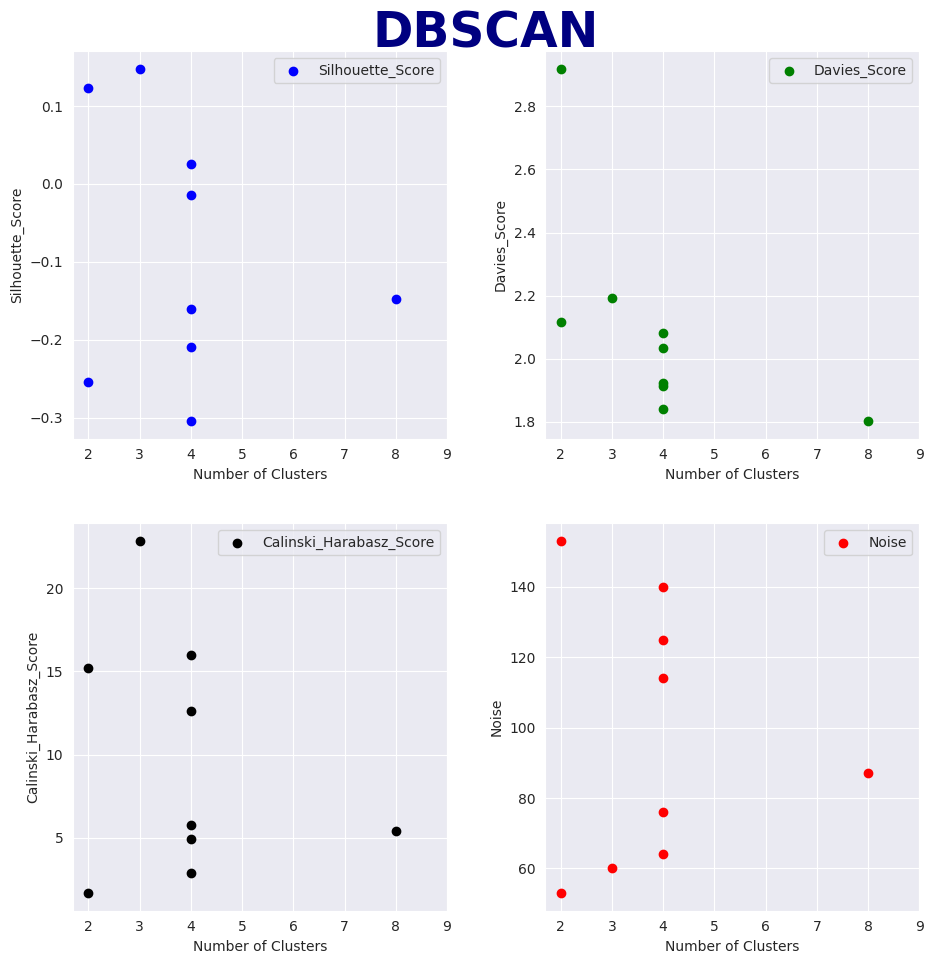

In [64]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('DBSCAN', fontsize=35, color='navy', fontweight='bold')


ax[0, 0].scatter(list_n, list_sil, label='Silhouette_Score', color='blue') # plot 1 : silhouette
ax[0, 0].legend()
ax[0, 0].set_xlabel('Number of Clusters')
ax[0, 0].set_ylabel('Silhouette_Score')
ax[0, 0].set_xticks(range(2, 10, 1))

ax[0, 1].scatter(list_n, list_davies, label='Davies_Score', color='green') # plot 2 : Davies
ax[0, 1].legend()
ax[0, 1].set_xlabel('Number of Clusters')
ax[0, 1].set_ylabel('Davies_Score')
ax[0, 1].set_xticks(range(2, 10, 1))


ax[1, 0].scatter(list_n, list_ch, label='Calinski_Harabasz_Score', color='black') # plot 3 : Calinski_Harabasz_Score
ax[1, 0].legend()
ax[1, 0].set_xlabel('Number of Clusters')
ax[1, 0].set_ylabel('Calinski_Harabasz_Score')
ax[1, 0].set_xticks(range(2, 10, 1))

ax[1, 1].scatter(list_n, list_noise, label='Noise', color='red') # plot 4 : Noise
ax[1, 1].legend()
ax[1, 1].set_xlabel('Number of Clusters')
ax[1, 1].set_ylabel('Noise')
ax[1, 1].set_xticks(range(2, 10, 1))

plt.show()

In [65]:
dbscan_sil_score = max(list_sil)
dbscan_sil_n = 2

dbscan_davies_score = max(list_davies)
dbscan_davies_n = 2

dbscan_ch_score = max(list_ch)
dbscan_ch_n = 3

# Mean Shift

In [66]:
list_sil = []
list_davies = []
list_ch = []
list_n = []
list_noise = []
list_eps = []

for i in range(2, 1000, 50) :
    bandwidth = estimate_bandwidth(pcs_df2, quantile=0.2, n_samples=i)
    if bandwidth > 0.5 :
        meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(pcs_df2)

        labels = meanshift.labels_
        if len(np.unique(labels)) > 1 :
            print('n_sample : ', n, 'Started')
            print('i=', i)

            # Number of clusters in labels, ignoring noise if present.

            n = len(np.unique(meanshift.labels_))

            sil = silhouette_score(pcs_df2, meanshift.labels_)
            davies = davies_bouldin_score(pcs_df2, meanshift.labels_)
            ch = calinski_harabasz_score(pcs_df2, meanshift.labels_)

            list_sil.append(sil)
            list_davies.append(davies)
            list_ch.append(ch)
            list_n.append(n)
            print("sil : ", sil)
            print('davies : ', davies)
            print('ch : ', ch)
            print('_'*45)



print('END')

n_sample :  10 Started
i= 52
sil :  0.3531365014719774
davies :  0.6196623890971406
ch :  13.516769534465414
_____________________________________________
n_sample :  6 Started
i= 102
sil :  0.3531365014719774
davies :  0.6196623890971406
ch :  13.516769534465414
_____________________________________________
n_sample :  6 Started
i= 152
sil :  0.3531365014719774
davies :  0.6196623890971406
ch :  13.516769534465414
_____________________________________________
n_sample :  6 Started
i= 202
sil :  0.3531365014719774
davies :  0.6196623890971406
ch :  13.516769534465414
_____________________________________________
n_sample :  6 Started
i= 252
sil :  0.3531365014719774
davies :  0.6196623890971406
ch :  13.516769534465414
_____________________________________________
n_sample :  6 Started
i= 302
sil :  0.3531365014719774
davies :  0.6196623890971406
ch :  13.516769534465414
_____________________________________________
n_sample :  6 Started
i= 352
sil :  0.3531365014719774
davies :  0.619

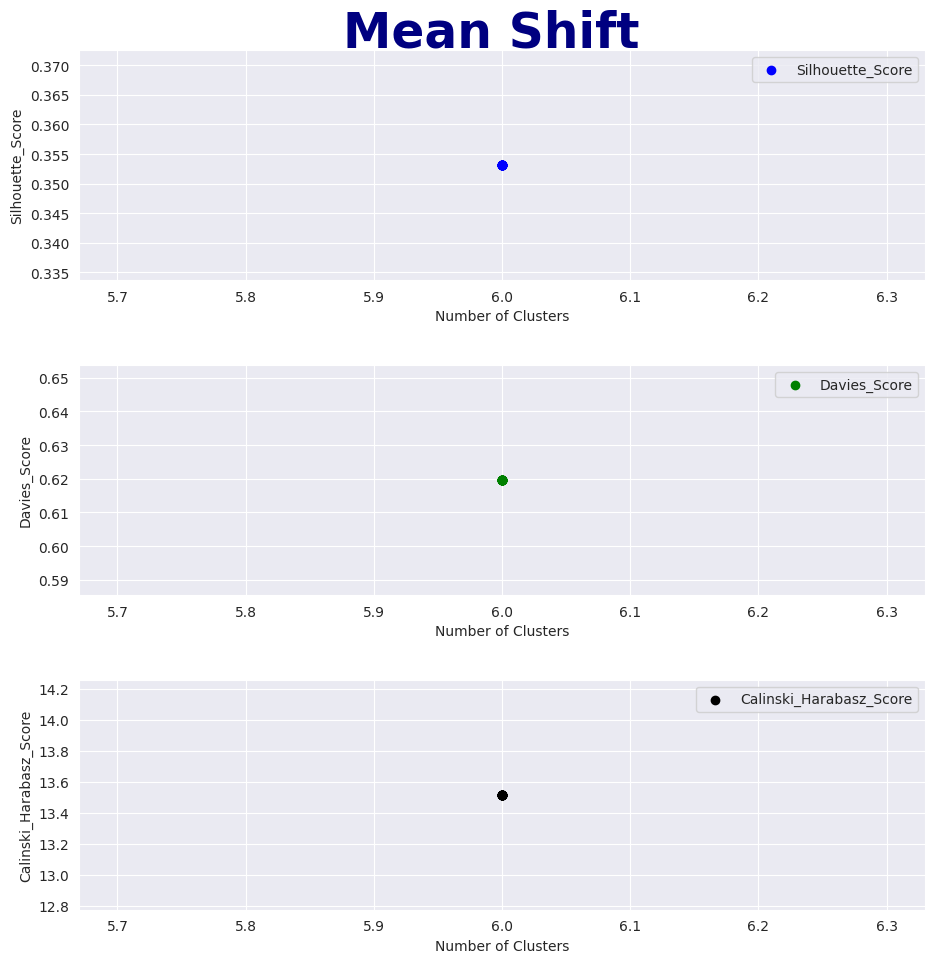

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Mean Shift', fontsize=35, color='navy', fontweight='bold')


ax1.scatter(list_n, list_sil, label='Silhouette_Score', color='blue') # plot 1 : silhouette
ax1.legend()
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette_Score')


ax2.scatter(list_n, list_davies, label='Davies_Score', color='green') # plot 2 : Davies
ax2.legend()
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Davies_Score')



ax3.scatter(list_n, list_ch, label='Calinski_Harabasz_Score', color='black') # plot 3 : Calinski_Harabasz_Score
ax3.legend()
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Calinski_Harabasz_Score')



plt.show()

In [68]:
print('Best n_cluster by mean shift : ', list_n[list_sil.index(max(list_sil))])

Best n_cluster by mean shift :  6


In [69]:
meanshift_sil_score = max(list_sil)
meanshift_davies_score = max(list_davies)
meanshift_ch_score = max(list_ch)

# AffinityPropagation

In [70]:
list_sil = []
list_davies = []
list_ch = []
list_n = []
list_damp = []
c = 1
for i in range(0, 10) :
    damp = 0.5 + (0.05*i)
    print('damp : ', damp, 'started, c=', c )
    c+=1

    affinity = AffinityPropagation(damping=damp).fit(pcs_df2)

    labels = affinity.labels_
    if len(np.unique(labels)) > 1 :
        n = len(np.unique(meanshift.labels_))

        sil = silhouette_score(pcs_df2, labels)
        davies = davies_bouldin_score(pcs_df2, labels)
        ch = calinski_harabasz_score(pcs_df2, labels)

        list_sil.append(sil)
        list_davies.append(davies)
        list_ch.append(ch)
        list_n.append(n)
        print("sil : ", sil)
        print('davies : ', davies)
        print('ch : ', ch)
        print('_'*45)
print('END')

damp :  0.5 started, c= 1
sil :  0.21487000089202316
davies :  0.9406032134263825
ch :  49.39305346007032
_____________________________________________
damp :  0.55 started, c= 2
sil :  0.21652893532865847
davies :  0.9410018399590968
ch :  49.62893318673257
_____________________________________________
damp :  0.6 started, c= 3
sil :  0.2244378359518658
davies :  0.8862443708984854
ch :  51.41665359933555
_____________________________________________
damp :  0.65 started, c= 4
sil :  0.21511358673940886
davies :  0.9038655945738753
ch :  50.140872806428895
_____________________________________________
damp :  0.7 started, c= 5
sil :  0.2244378359518658
davies :  0.8862443708984854
ch :  51.41665359933555
_____________________________________________
damp :  0.75 started, c= 6
sil :  0.2244378359518658
davies :  0.8862443708984854
ch :  51.41665359933555
_____________________________________________
damp :  0.8 started, c= 7
sil :  0.2244378359518658
davies :  0.8862443708984854
ch :  

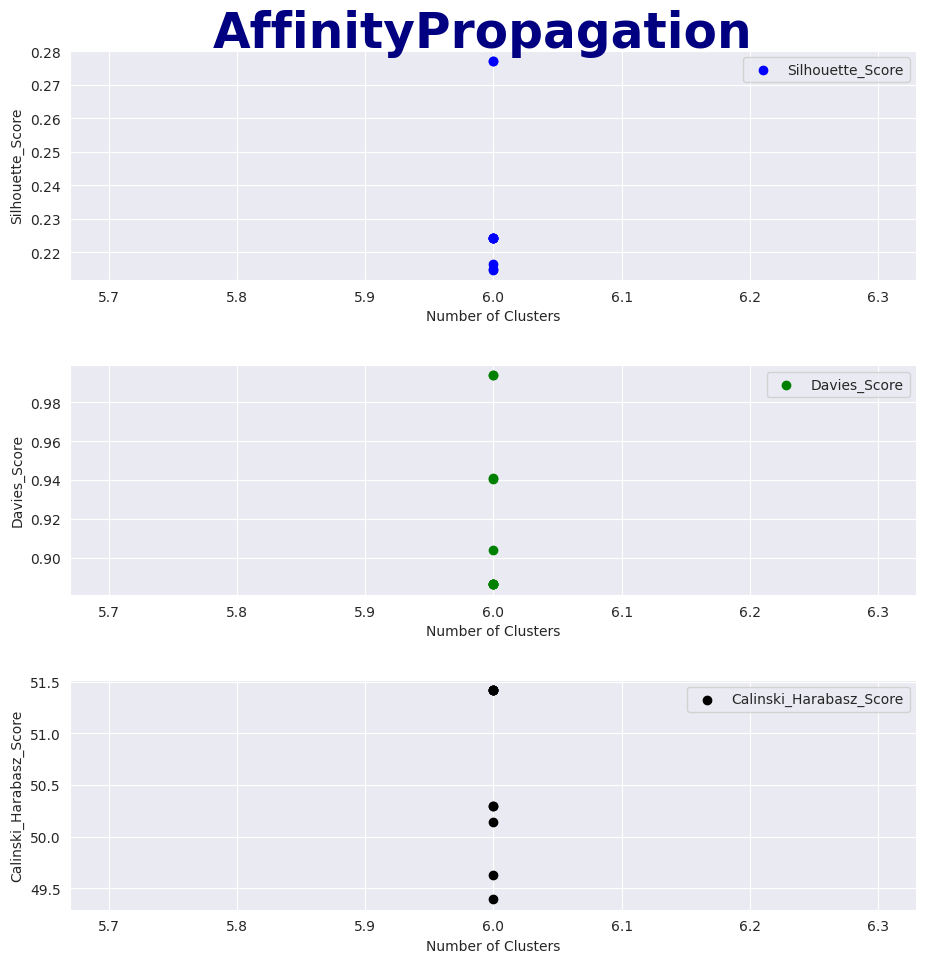

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('AffinityPropagation', fontsize=35, color='navy', fontweight='bold')


ax1.scatter(list_n, list_sil, label='Silhouette_Score', color='blue') # plot 1 : silhouette
ax1.legend()
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette_Score')
# ax1.set_xticks(range(48, 63, 2))

ax2.scatter(list_n, list_davies, label='Davies_Score', color='green') # plot 2 : Davies
ax2.legend()
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Davies_Score')
# ax2.set_xticks(range(2, 40, 2))


ax3.scatter(list_n, list_ch, label='Calinski_Harabasz_Score', color='black') # plot 3 : Calinski_Harabasz_Score
ax3.legend()
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Calinski_Harabasz_Score')
# ax3.set_xticks(range(2, 40, 2))

# ax[1, 1].plot(list_n, list_noise, label='Noise', color='red') # plot 4 : Noise
# ax[1, 1].legend()
# ax[1, 1].set_xlabel('Number of Clusters')
# ax[1, 1].set_ylabel('Noise')
# ax[1, 1].set_xticks(range(2, 40, 2))

plt.show()

In [72]:
affiniti_sil_score = max(list_sil)
affiniti_davies_score = max(list_davies)
affiniti_ch_score = max(list_ch)

In [73]:
print('Best n_cluster by mean shift : ', list_n[list_sil.index(max(list_sil))])

Best n_cluster by mean shift :  6


# Finding best n_cluster

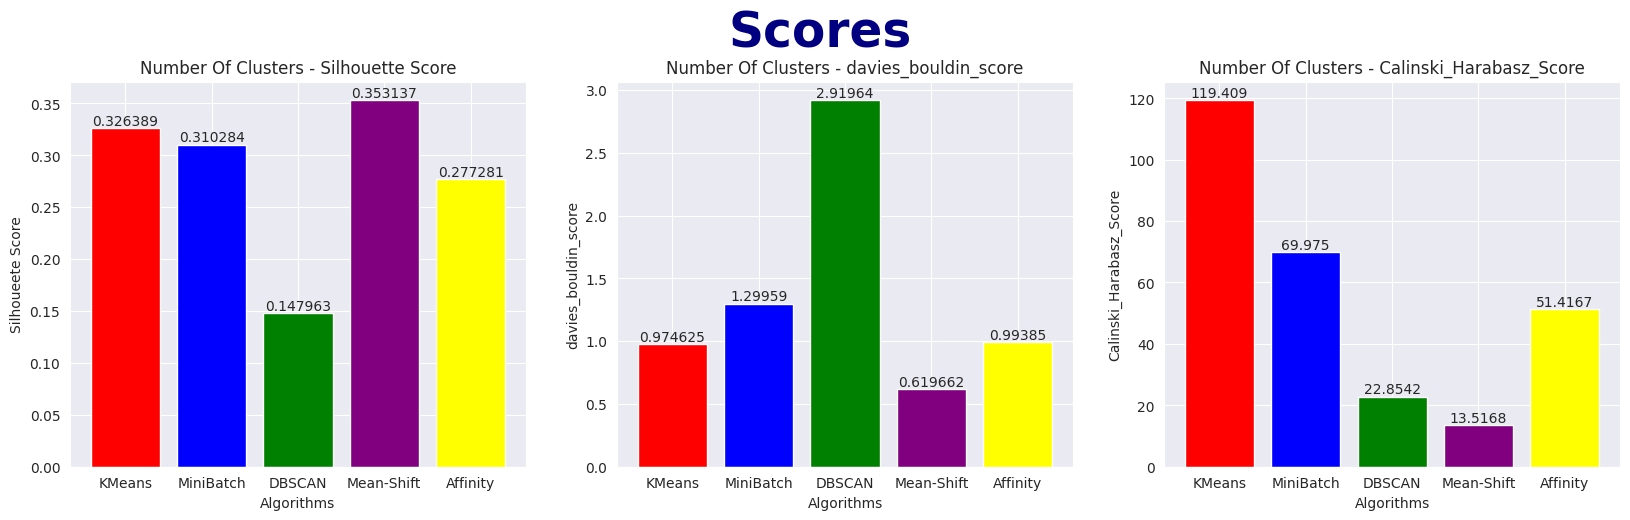

In [74]:
labels = ['KMeans', 'MiniBatch', 'DBSCAN', 'Mean-Shift', 'Affinity']
color = ['red', 'blue', 'green', 'purple', 'yellow']
sil = [kmeans_sil_score, mini_sil_score, dbscan_sil_score, meanshift_sil_score, affiniti_sil_score]
davies = [kmeans_davies_score, mini_davies_score, dbscan_davies_score, meanshift_davies_score, affiniti_davies_score]
ch = [kmeans_ch_score, mini_ch_score, dbscan_ch_score, meanshift_ch_score , affiniti_ch_score]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Scores', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 : Silhouette Score
bar_container = ax1.bar(labels, sil, color=color, edgecolor="white")
ax1.bar_label(bar_container)
ax1.set(xlabel='Algorithms', ylabel='Silhoueete Score', title='Number Of Clusters - Silhouette Score')

# ax2 : Davies Bouldin Score
bar_container = ax2.bar(labels, davies, color=color, edgecolor="white")
ax2.bar_label(bar_container)
ax2.set(xlabel='Algorithms', ylabel='davies_bouldin_score', title='Number Of Clusters - davies_bouldin_score')

# ax3 : Calinski Harabasz Score
bar_container = ax3.bar(labels, ch, color=color, edgecolor="white")
ax3.bar_label(bar_container)
ax3.set(xlabel='Algorithms', ylabel='Calinski_Harabasz_Score', title='Number Of Clusters - Calinski_Harabasz_Score')


plt.show()

< number of clusters >
- KMeans : 2, 4
- MiniBatch : 4, 2
- DBSCAN : 2, 3
- MeanShift : 6
- Affinity : 6

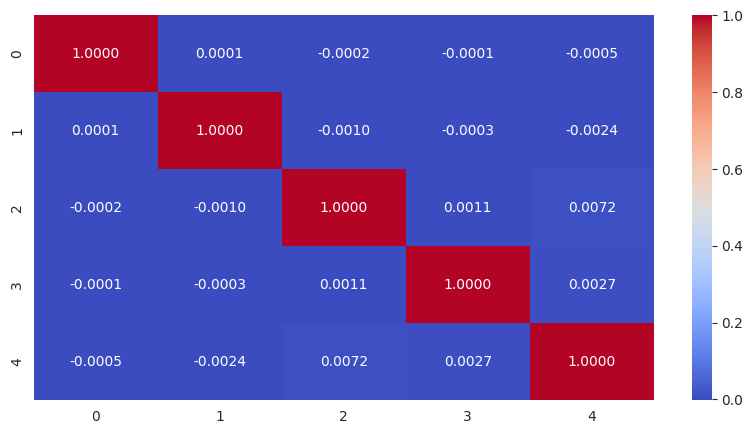

In [75]:
plt.figure(figsize = (10,5))
sns.heatmap(corrmat, annot = True, cmap='coolwarm', fmt='.4f', linecolor='white')
plt.show()

In [76]:
# we use PC1 as common feature for plotting
df1 = pcs_df2.copy()

## KMeans & n_cluster = 2

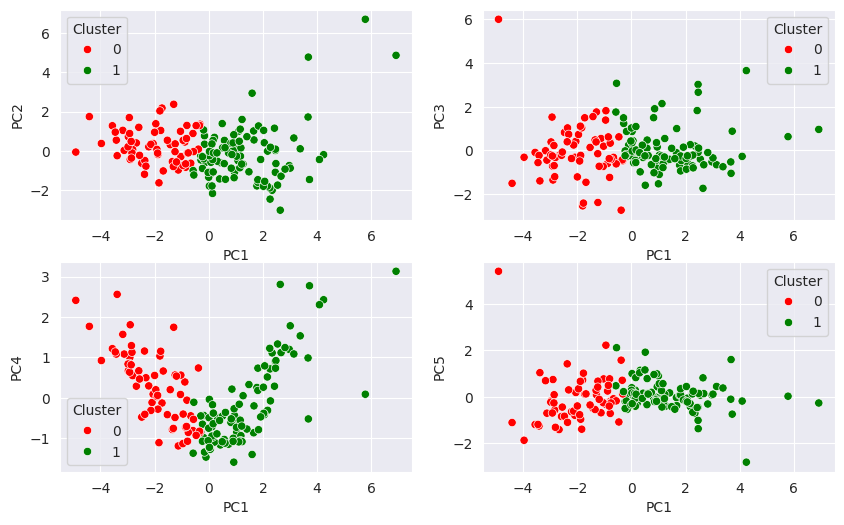

In [77]:
df1 = pcs_df2.copy()

kmeans_set = {
    'init' : 'random',
    'n_init' : 'auto',
    'max_iter' : 300,
    'random_state' : 42
}

kmeans = KMeans(n_clusters=2, **kmeans_set)
kmeans.fit(df1)

df1['Cluster'] = kmeans.fit_predict(df1)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', ax=ax[0, 0], hue='Cluster', palette=['r', 'g', 'b'])
sns.scatterplot(data=df1, x='PC1', y='PC3', ax=ax[0, 1], hue='Cluster', palette=['r', 'g', 'b'])
sns.scatterplot(data=df1, x='PC1', y='PC4', ax=ax[1, 0], hue='Cluster', palette=['r', 'g', 'b'])
sns.scatterplot(data=df1, x='PC1', y='PC5', ax=ax[1, 1], hue='Cluster', palette=['r', 'g', 'b'])
plt.show()

## KMeans & n_cluster = 4

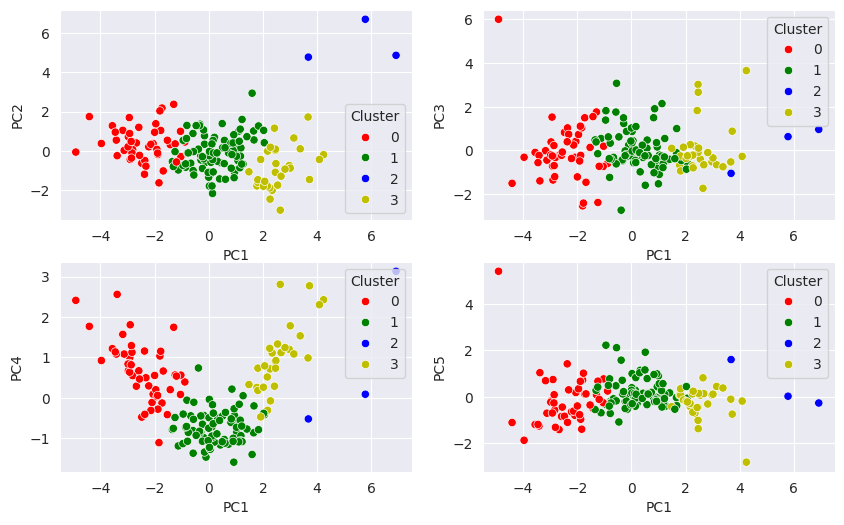

In [78]:
df1 = pcs_df2.copy()

kmeans_set = {
    'init' : 'random',
    'n_init' : 'auto',
    'max_iter' : 300,
    'random_state' : 42
}

kmeans = KMeans(n_clusters=4, **kmeans_set)
kmeans.fit(df1)

df1['Cluster'] = kmeans.fit_predict(df1)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', ax=ax[0, 0], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC3', ax=ax[0, 1], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC4', ax=ax[1, 0], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC5', ax=ax[1, 1], hue='Cluster', palette=['r', 'g', 'b', 'y'])
plt.show()

## DBSCAN & n_cluster = 3

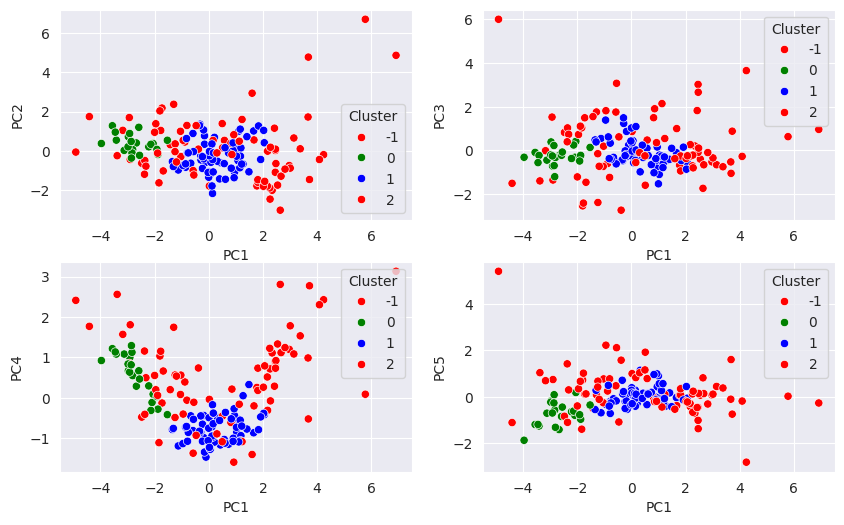

In [79]:
df1 = pcs_df2.copy()

# eps =  0.95
# Estimated number of clusters: 3
# Estimated number of noise points: 60
# Silhouette :  0.1479630301553322
# Davis :  2.192426772968678
# CH Score :  22.854210861478446

dbscan = DBSCAN(eps =  0.95).fit(df1)

df1['Cluster'] = dbscan.fit_predict(df1)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', ax=ax[0, 0], hue='Cluster', palette=['r', 'g', 'b'])
sns.scatterplot(data=df1, x='PC1', y='PC3', ax=ax[0, 1], hue='Cluster', palette=['r', 'g', 'b'])
sns.scatterplot(data=df1, x='PC1', y='PC4', ax=ax[1, 0], hue='Cluster', palette=['r', 'g', 'b'])
sns.scatterplot(data=df1, x='PC1', y='PC5', ax=ax[1, 1], hue='Cluster', palette=['r', 'g', 'b'])
plt.show()

## DBSCAN & n_cluster = 4

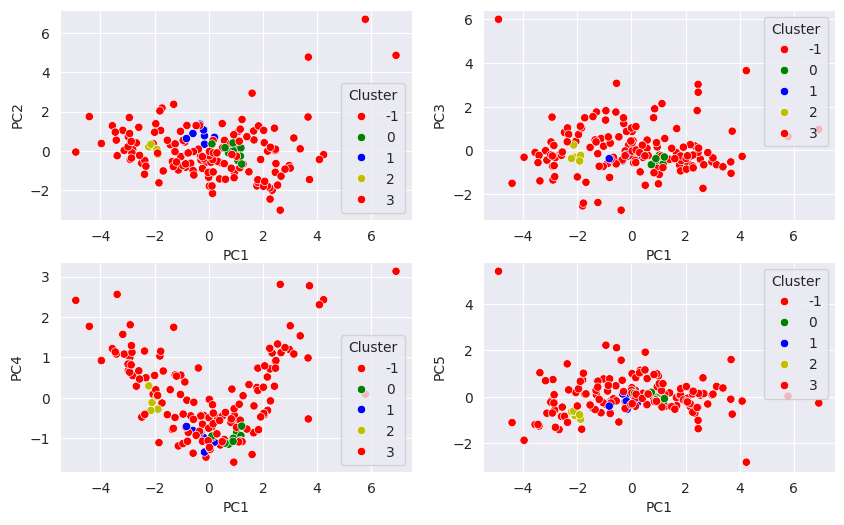

In [80]:
df1 = pcs_df2.copy()

# eps =  0.65
# Estimated number of clusters: 4
# Estimated number of noise points: 140
# Silhouette :  -0.3039203906607828
# Davis :  1.8394219851742957
# CH Score :  2.8722294203023697

dbscan = DBSCAN(eps =  0.65).fit(df1)

df1['Cluster'] = dbscan.fit_predict(df1)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', ax=ax[0, 0], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC3', ax=ax[0, 1], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC4', ax=ax[1, 0], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC5', ax=ax[1, 1], hue='Cluster', palette=['r', 'g', 'b', 'y'])
plt.show()

## MeanShift & n_cluster = 6

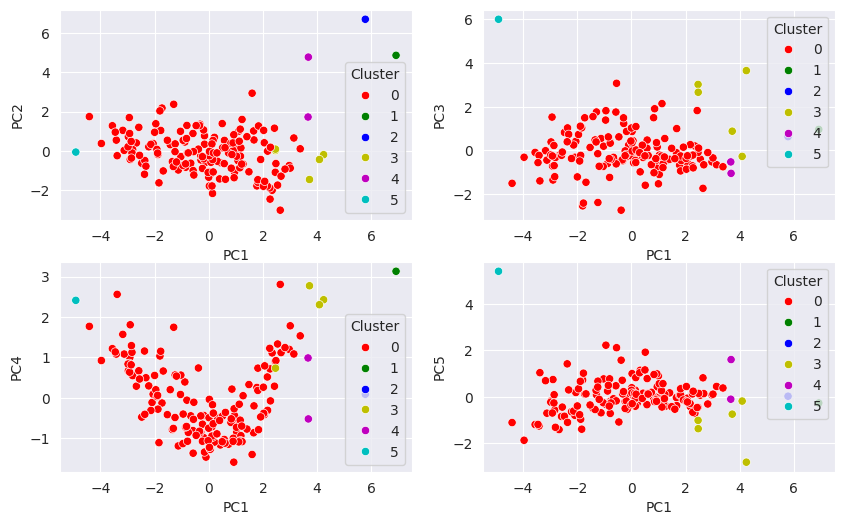

In [81]:
df1 = pcs_df2.copy()

bandwidth = estimate_bandwidth(df1, quantile=0.2, n_samples=52)
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(df1)

df1['Cluster'] = meanshift.fit_predict(df1)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', ax=ax[0, 0], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm', 'c'])
sns.scatterplot(data=df1, x='PC1', y='PC3', ax=ax[0, 1], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm', 'c'])
sns.scatterplot(data=df1, x='PC1', y='PC4', ax=ax[1, 0], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm', 'c'])
sns.scatterplot(data=df1, x='PC1', y='PC5', ax=ax[1, 1], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm', 'c'])
plt.show()

## MiniBatch & n_cluster = 2

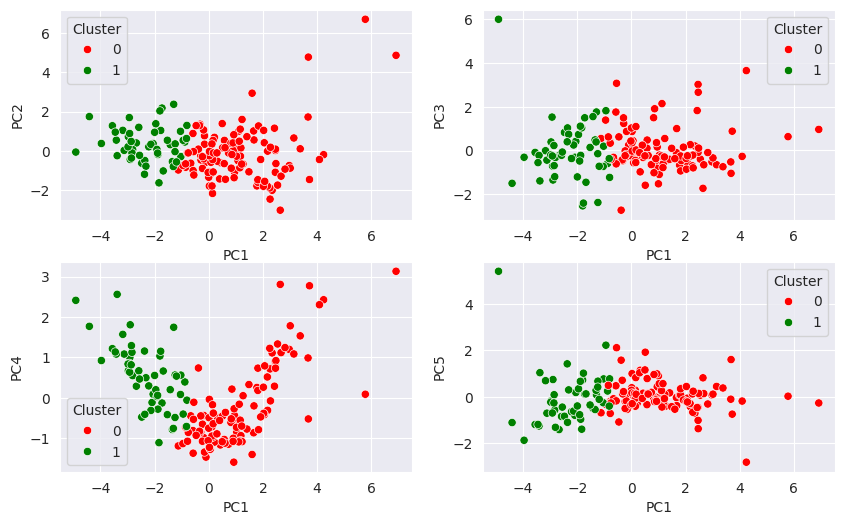

In [82]:
df1 = pcs_df2.copy()

mini = MiniBatchKMeans(n_clusters=2)
mini.fit(df1)

df1['Cluster'] = mini.fit_predict(df1)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', ax=ax[0, 0], hue='Cluster', palette=['r', 'g'])
sns.scatterplot(data=df1, x='PC1', y='PC3', ax=ax[0, 1], hue='Cluster', palette=['r', 'g'])
sns.scatterplot(data=df1, x='PC1', y='PC4', ax=ax[1, 0], hue='Cluster', palette=['r', 'g'])
sns.scatterplot(data=df1, x='PC1', y='PC5', ax=ax[1, 1], hue='Cluster', palette=['r', 'g'])
plt.show()

## MiniBatch & n_cluster = 4

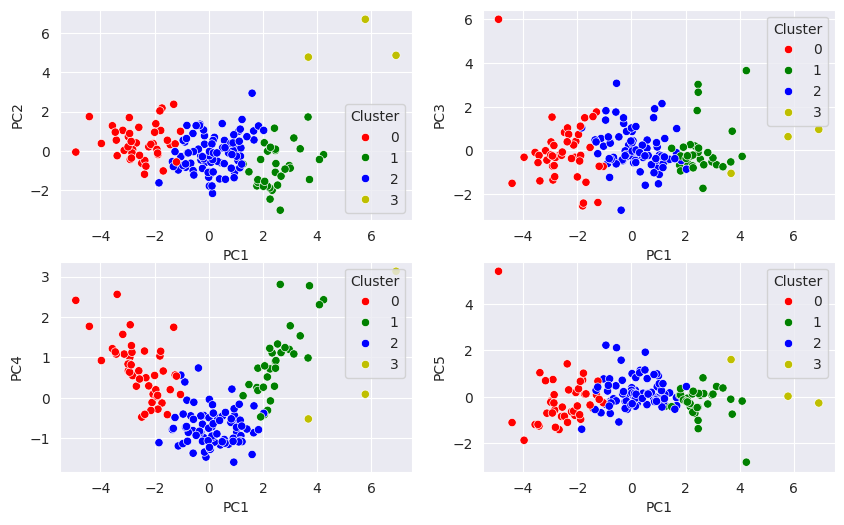

In [83]:
df1 = pcs_df2.copy()

mini = MiniBatchKMeans(n_clusters=4)
mini.fit(df1)


df1['Cluster'] = mini.fit_predict(df1)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', ax=ax[0, 0], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC3', ax=ax[0, 1], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC4', ax=ax[1, 0], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC5', ax=ax[1, 1], hue='Cluster', palette=['r', 'g', 'b', 'y'])
plt.show()

## Affinity & n_cluster = 6

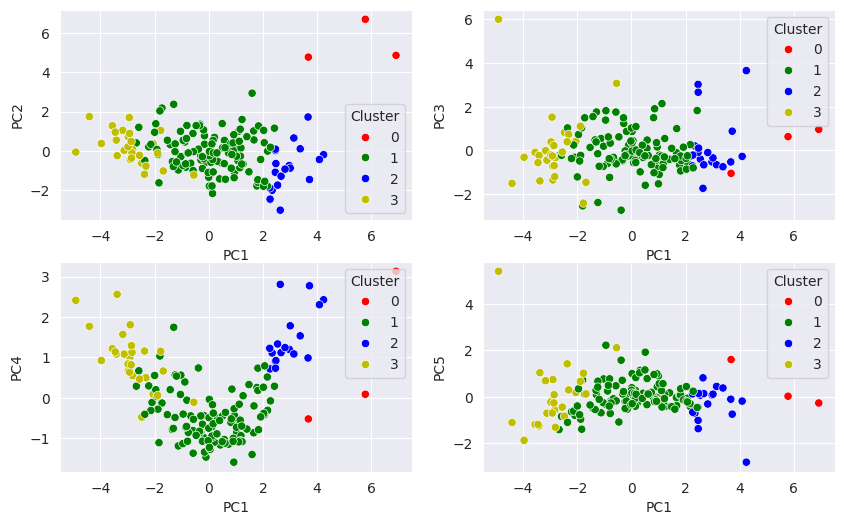

In [84]:
df1 = pcs_df2.copy()

affinity = AffinityPropagation(damping=0.95).fit(df1)


df1['Cluster'] = affinity.fit_predict(df1)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', ax=ax[0, 0], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm', 'c'])
sns.scatterplot(data=df1, x='PC1', y='PC3', ax=ax[0, 1], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm', 'c'])
sns.scatterplot(data=df1, x='PC1', y='PC4', ax=ax[1, 0], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm', 'c'])
sns.scatterplot(data=df1, x='PC1', y='PC5', ax=ax[1, 1], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm', 'c'])
plt.show()

### best choises (base on plots):
- KMean(n_cluster=2)
- KMean(n_cluster=4)
- MiniBatch(n_cluster=2) <--- Best

In [85]:
df1 = pcs_df2.copy()

mini = MiniBatchKMeans(n_clusters=2)
mini.fit(df1)

df1['Cluster'] = mini.fit_predict(df1)

In [86]:
df1.insert(0, 'country', country)
df1

,country,PC1,PC2,PC3,PC4,PC5,Cluster
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205,0
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227,1
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186,0
...,...,...,...,...,...,...,...
162,Vanuatu,-0.820753,0.636404,-0.379488,-0.706886,-0.400381,1
163,Venezuela,-0.549894,-1.215018,3.074556,-0.108594,2.114025,1
164,Vietnam,0.498570,1.392777,-0.252849,-1.085037,1.156471,0
165,Yemen,-1.887294,-0.105397,1.107639,0.062636,0.665467,1


# Clusters

In [87]:
df1.Cluster.replace({
    0 : 'Poor',
    1 : 'Rich'
}, inplace=True)

In [88]:
poor = df1[df1.Cluster=='Poor']
poor

,country,PC1,PC2,PC3,PC4,PC5,Cluster
1,Albania,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Poor
4,Antigua and Barbuda,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Poor
5,Argentina,0.022890,-1.772736,0.864500,-0.036747,0.997895,Poor
6,Armenia,-0.101463,-0.567318,0.248107,-1.466023,-0.085832,Poor
7,Australia,2.342153,-1.989710,0.198795,1.113413,-0.710654,Poor
...,...,...,...,...,...,...,...
157,United Arab Emirates,2.427491,1.159100,1.822990,0.288816,-0.462769,Poor
158,United Kingdom,2.067999,-1.536828,-0.249088,0.792830,-0.223893,Poor
159,United States,2.641648,-2.998696,-1.741034,2.809826,0.816417,Poor
160,Uruguay,0.617287,-1.431525,-0.235307,-0.359604,0.118536,Poor


In [89]:
rich = df1[df1.Cluster=='Rich']
rich

,country,PC1,PC2,PC3,PC4,PC5,Cluster
0,Afghanistan,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Rich
2,Algeria,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Rich
3,Angola,-2.932714,1.698771,1.525076,0.855595,-0.214778,Rich
12,Bangladesh,-1.123979,-0.961083,0.542964,-1.189204,-0.688348,Rich
17,Benin,-2.673005,0.411199,-0.237232,0.289668,-1.411854,Rich
...,...,...,...,...,...,...,...
161,Uzbekistan,-0.853238,-0.649521,0.617276,-0.722564,0.492597,Rich
162,Vanuatu,-0.820753,0.636404,-0.379488,-0.706886,-0.400381,Rich
163,Venezuela,-0.549894,-1.215018,3.074556,-0.108594,2.114025,Rich
165,Yemen,-1.887294,-0.105397,1.107639,0.062636,0.665467,Rich
